# Data Analytics Project- Traffic Accident Duration Prediction Models

In [ ]:
from pyspark.sql import SparkSession

# Initialize a SparkSession
spark = SparkSession.builder.enableHiveSupport().getOrCreate()

# Read the tables stored in Databricks into DataFrames
# because of the file size, the data was splitted into different files
df_0 = spark.sql("SELECT * FROM chunk_0")

df_1 = spark.sql("SELECT * FROM chunk_1")

df_2 = spark.sql("SELECT * FROM chunk_2")

df_3 = spark.sql("SELECT * FROM chunk_3")

df_4 = spark.sql("SELECT * FROM chunk_4")

df_5 = spark.sql("SELECT * FROM chunk_5")

df_6 = spark.sql("SELECT * FROM chunk_6")

df_7 = spark.sql("SELECT * FROM chunk_7")

# Append the DataFrames together
df = df_0.union(df_1).union(df_2).union(df_3).union(df_4).union(df_5).union(df_6).union(df_7)

In [ ]:
from pyspark.sql.functions import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

In [ ]:
seed=12

In [ ]:
#to check how many rows and columns the dataset contains
num_rows = df.count()
print(f"The data frame contains {num_rows} number of rows.")
num_cols = len(df.columns)
print(f"The data frame contains {num_cols} number of columns.")


The data frame contains 7728394 number of rows.
The data frame contains 46 number of columns.


In [ ]:
# display top five rows of each column to understand how the data looks like
df.select(df.columns[0:10]).show(5, truncate=False)


+---+-------+--------+-------------------+-------------------+-----------------+------------------+-------+-------+------------+
|ID |Source |Severity|Start_Time         |End_Time           |Start_Lat        |Start_Lng         |End_Lat|End_Lng|Distance(mi)|
+---+-------+--------+-------------------+-------------------+-----------------+------------------+-------+-------+------------+
|A-1|Source2|3       |2016-02-08 05:46:00|2016-02-08 11:00:00|39.865147        |-84.058723        |NULL   |NULL   |0.01        |
|A-2|Source2|2       |2016-02-08 06:07:59|2016-02-08 06:37:59|39.92805900000001|-82.831184        |NULL   |NULL   |0.01        |
|A-3|Source2|2       |2016-02-08 06:49:27|2016-02-08 07:19:27|39.063148        |-84.032608        |NULL   |NULL   |0.01        |
|A-4|Source2|3       |2016-02-08 07:23:34|2016-02-08 07:53:34|39.747753        |-84.20558199999998|NULL   |NULL   |0.01        |
|A-5|Source2|2       |2016-02-08 07:39:07|2016-02-08 08:09:07|39.627781        |-84.188354       

In [ ]:
df.select(df.columns[10:20]).show(5, truncate=False)


+-------------------------------------------------------------------------------------+-------------------------+------------+----------+-----+----------+-------+----------+------------+-------------------+
|Description                                                                          |Street                   |City        |County    |State|Zipcode   |Country|Timezone  |Airport_Code|Weather_Timestamp  |
+-------------------------------------------------------------------------------------+-------------------------+------------+----------+-----+----------+-------+----------+------------+-------------------+
|Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.|I-70 E                   |Dayton      |Montgomery|OH   |45424     |US     |US/Eastern|KFFO        |2016-02-08 05:58:00|
|Accident on Brice Rd at Tussing Rd. Expect delays.                                   |Brice Rd                 |Reynoldsburg|Franklin  |OH   |43068-3402|US     |US/Eastern

In [ ]:
df.select(df.columns[20:30]).show(5, truncate=False)

+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+
|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity|
+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+
|36.9          |NULL         |91.0       |29.68       |10.0          |Calm          |NULL           |0.02             |Light Rain       |false  |
|37.9          |NULL         |100.0      |29.65       |10.0          |Calm          |NULL           |0.0              |Light Rain       |false  |
|36.0          |33.3         |100.0      |29.67       |10.0          |SW            |3.5            |NULL             |Overcast         |false  |
|35.1          |31.0         |96.0       |29.64       |9.0           |SW            |4.6            |NULL             |Mostl

In [ ]:
df.select(df.columns[30:40]).show(5, truncate=False)

+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+
|Bump |Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop |Traffic_Calming|
+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+
|false|false   |false   |false   |false  |false  |false     |false  |false|false          |
|false|false   |false   |false   |false  |false  |false     |false  |false|false          |
|false|false   |false   |false   |false  |false  |false     |false  |false|false          |
|false|false   |false   |false   |false  |false  |false     |false  |false|false          |
|false|false   |false   |false   |false  |false  |false     |false  |false|false          |
+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+
only showing top 5 rows



In [ ]:
df.select(df.columns[40:]).show(5, truncate=False)

+--------------+------------+--------------+--------------+-----------------+---------------------+
|Traffic_Signal|Turning_Loop|Sunrise_Sunset|Civil_Twilight|Nautical_Twilight|Astronomical_Twilight|
+--------------+------------+--------------+--------------+-----------------+---------------------+
|false         |false       |Night         |Night         |Night            |Night                |
|false         |false       |Night         |Night         |Night            |Day                  |
|true          |false       |Night         |Night         |Day              |Day                  |
|false         |false       |Night         |Day           |Day              |Day                  |
|true          |false       |Day           |Day           |Day              |Day                  |
+--------------+------------+--------------+--------------+-----------------+---------------------+
only showing top 5 rows



In [ ]:
df.dtypes

[('ID', 'string'),
 ('Source', 'string'),
 ('Severity', 'bigint'),
 ('Start_Time', 'timestamp'),
 ('End_Time', 'timestamp'),
 ('Start_Lat', 'double'),
 ('Start_Lng', 'double'),
 ('End_Lat', 'string'),
 ('End_Lng', 'string'),
 ('Distance(mi)', 'double'),
 ('Description', 'string'),
 ('Street', 'string'),
 ('City', 'string'),
 ('County', 'string'),
 ('State', 'string'),
 ('Zipcode', 'string'),
 ('Country', 'string'),
 ('Timezone', 'string'),
 ('Airport_Code', 'string'),
 ('Weather_Timestamp', 'timestamp'),
 ('Temperature(F)', 'double'),
 ('Wind_Chill(F)', 'double'),
 ('Humidity(%)', 'double'),
 ('Pressure(in)', 'double'),
 ('Visibility(mi)', 'double'),
 ('Wind_Direction', 'string'),
 ('Wind_Speed(mph)', 'double'),
 ('Precipitation(in)', 'double'),
 ('Weather_Condition', 'string'),
 ('Amenity', 'boolean'),
 ('Bump', 'boolean'),
 ('Crossing', 'boolean'),
 ('Give_Way', 'boolean'),
 ('Junction', 'boolean'),
 ('No_Exit', 'boolean'),
 ('Railway', 'boolean'),
 ('Roundabout', 'boolean'),
 ('Stat

# Preprocessing

In [ ]:
# Initially I chose 19 features to analyze and excluded the features that have too many null values
# (e.g. 'End_Lat' and 'End_Lng' have almost 50% of the values with null values)
selected_df = df.select(
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Street',
 'City',
 'County',
 'State',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Sunrise_Sunset')


# 1. Feature creation

In [ ]:
# calculate the duration in minutes and create a new column with that feature
selected_df = selected_df.withColumn("Duration", ((unix_timestamp("End_Time") - unix_timestamp("Start_Time"))/60))

# Show the results
selected_df.select("Start_Time", "End_Time", "Duration").show()


+-------------------+-------------------+--------+
|         Start_Time|           End_Time|Duration|
+-------------------+-------------------+--------+
|2016-02-08 05:46:00|2016-02-08 11:00:00|   314.0|
|2016-02-08 06:07:59|2016-02-08 06:37:59|    30.0|
|2016-02-08 06:49:27|2016-02-08 07:19:27|    30.0|
|2016-02-08 07:23:34|2016-02-08 07:53:34|    30.0|
|2016-02-08 07:39:07|2016-02-08 08:09:07|    30.0|
|2016-02-08 07:44:26|2016-02-08 08:14:26|    30.0|
|2016-02-08 07:59:35|2016-02-08 08:29:35|    30.0|
|2016-02-08 07:59:58|2016-02-08 08:29:58|    30.0|
|2016-02-08 08:00:40|2016-02-08 08:30:40|    30.0|
|2016-02-08 08:10:04|2016-02-08 08:40:04|    30.0|
|2016-02-08 08:14:42|2016-02-08 08:44:42|    30.0|
|2016-02-08 08:21:27|2016-02-08 08:51:27|    30.0|
|2016-02-08 08:36:34|2016-02-08 09:06:34|    30.0|
|2016-02-08 08:37:07|2016-02-08 09:07:07|    30.0|
|2016-02-08 08:39:43|2016-02-08 09:09:43|    30.0|
|2016-02-08 08:43:20|2016-02-08 09:13:20|    30.0|
|2016-02-08 08:53:17|2016-02-08

# 2. Handling outliers

In [ ]:
def IQR_method(df_name, col_name):
    # to find outliers using IQR methods
    quartiles = df_name.approxQuantile(col_name, [0.25, 0.75], 0.01)
    
    Q1 = quartiles[0]
    print("Q1: ", Q1)
    
    Q3 = quartiles[1]
    print("Q3: ", Q3)
    
    IQR = Q3 - Q1
    
    lowerBound = Q1 - 1.5 * IQR
    print("lower bound: ", lowerBound)
    
    upperBound = Q3 + 1.5 * IQR
    print("upper bound: ", upperBound)

    outliers_df = df_name.filter((col(col_name) < lowerBound) | (col(col_name) > upperBound))
    print("number of outliers: ", outliers_df.count())
    
    print("percentage of outliers from the dataset: ", (outliers_df.count()/df_name.count()) * 100)

    #removing the outliers from the dataset
    filtered_df = df_name.filter((col(col_name) > lowerBound) & (col(col_name) < upperBound))
    print("number of rows after removing outliers: ", filtered_df.count())

    return filtered_df


In [ ]:
selected_df.select("Duration").summary().show()

+-------+------------------+
|summary|          Duration|
+-------+------------------+
|  count|           7728394|
|   mean| 444.4209568722842|
| stddev|13512.292555250438|
|    min|1.2166666666666666|
|    25%|              31.5|
|    50%| 74.83333333333333|
|    75%|            125.15|
|    max|         2812939.0|
+-------+------------------+



In [ ]:
#remove outliers for "Duration" column which will be our target variable
removed_duration_df = IQR_method(selected_df, "Duration")


q1:  31.483333333333334
q3:  124.76666666666667
lower bound:  -108.44166666666668
upper bound:  264.69166666666666
number of outliers:  733470
percentage of outliers from the dataset:  9.49058756579957
number of rows after removing outliers:  6994924


In [ ]:
removed_duration_df.select("Distance(mi)").summary().show()

+-------+------------------+
|summary|      Distance(mi)|
+-------+------------------+
|  count|           6994924|
|   mean|0.4962731469368714|
| stddev|1.6355377221615042|
|    min|               0.0|
|    25%|               0.0|
|    50%|              0.01|
|    75%|0.3720000000000001|
|    max|336.57000732421875|
+-------+------------------+



array([[<AxesSubplot:title={'center':'Distance(mi)'}>]], dtype=object)

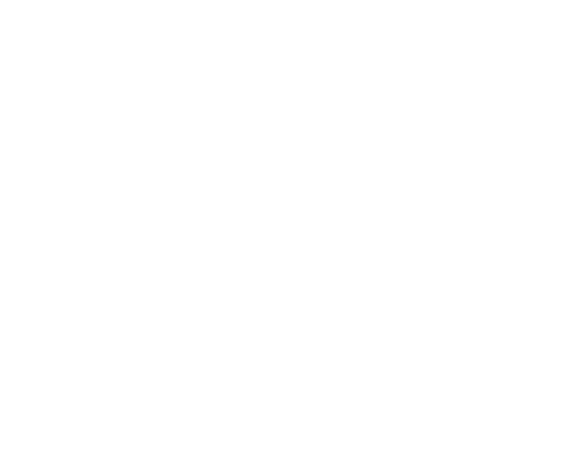

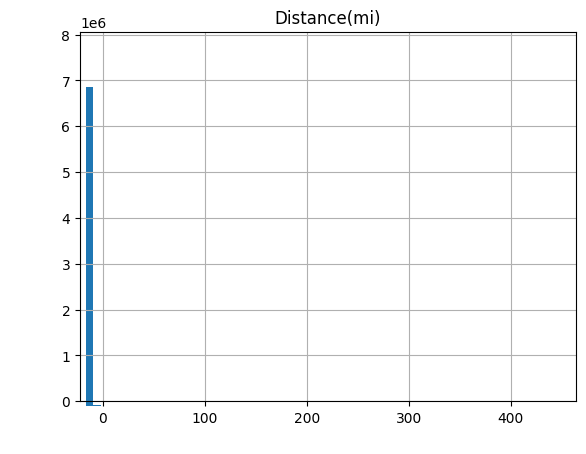

In [ ]:
df.select("Distance(mi)").toPandas().hist(bins=50)

In [ ]:
#remove outliers for "Distance(mi)" because it is highly skewed to the left (less than 1 mile)
outliers_removed_df = IQR_method(removed_duration_df, "Distance(mi)")


q1:  0.0
q3:  0.3670000000000001
lower bound:  -0.5505000000000002
upper bound:  0.9175000000000003
number of outliers:  1003836
percentage of outliers from the dataset:  14.350920753392032
number of rows after removing outliers:  5991088


In [ ]:
outliers_removed_df.select('Visibility(mi)').summary().show()

#keep visibility that are less than 20 only because the majority is skewed to the left (less than 10 miles)
removed_visibil_df = outliers_removed_df.filter(col('Visibility(mi)') < 20)

print("number of rows after removing outliers: ", removed_visibil_df.count())

+-------+-----------------+
|summary|   Visibility(mi)|
+-------+-----------------+
|  count|          5862493|
|   mean|9.119237012308606|
| stddev|2.642281516788764|
|    min|              0.0|
|    25%|             10.0|
|    50%|             10.0|
|    75%|             10.0|
|    max|            140.0|
+-------+-----------------+

number of rows after removing outliers:  5851403


In [ ]:
#count nulls in each column and display the results
null_counts = removed_visibil_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in removed_visibil_df.columns])
null_counts.show(truncate=False)


+--------+----------+--------+---------+---------+------------+------+----+------+-----+-----------------+--------------+-------------+-----------+------------+--------------+---------------+-----------------+--------------+--------+
|Severity|Start_Time|End_Time|Start_Lat|Start_Lng|Distance(mi)|Street|City|County|State|Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Speed(mph)|Precipitation(in)|Sunrise_Sunset|Duration|
+--------+----------+--------+---------+---------+------------+------+----+------+-----+-----------------+--------------+-------------+-----------+------------+--------------+---------------+-----------------+--------------+--------+
|0       |0         |0       |0        |0        |0           |8406  |144 |0     |0    |0                |19216         |1458611      |26794      |6709        |0             |337200         |1626740          |12816         |0       |
+--------+----------+--------+---------+---------+------------+-

# 3. Handling missing data

In [ ]:
# handling missing values in columns
from pyspark.sql.window import Window
#set the window spec to be in the timely order based on the weather timestamp recording the time when the weather data was observed
window_spec = Window.orderBy('Weather_Timestamp')

def handle_missing_values(col_name, df_name, window_spec):

    column = df_name[col_name]
    #calculate the average value of the column
    avg_value = df_name.select(avg(col_name)).collect()[0][0]

    #when there are missing values, replace the null values according to the following conditions:
    #1) use the previous value from the lag function when it is available
    #2) use the next value from the lead function when it is available
    #3) use the constant of average value from lit function when none of the previous or next values are available
    #otherwise, when it is not null, keep the value as it is
    result_df = df_name.withColumn(col_name, 
                                    when(isnull(column), 
                                        coalesce(lag(column).over(window_spec), 
                                                lead(column).over(window_spec),
                                                lit(avg_value))).otherwise(column))
    
    return result_df
    

In [ ]:
# fill the missing values in 'Temperature(F)'
filtered_temp = handle_missing_values('Temperature(F)', removed_visibil_df, window_spec)


In [ ]:
# as Sunrise_Sunset column contains categorical data (i.e., Day or Night based on Sunrise and Sunset),
# we will use forward filling method to fill missing values by replacing it with previous data.
# if there is a null value, replace with a previous non-null value.
filtered_sun = filtered_temp.withColumn("Sunrise_Sunset", last("Sunrise_Sunset", ignorenulls=True).over(window_spec))


In [ ]:
# Weather_Timestamp was used for window spec but will not be used further, so drop here
#as we did calculate and create Duration column already, End_Time also can be dropped as it will not be used further
selected_cols_df = filtered_sun.drop("Weather_Timestamp", "End_Time")

#check again nulls
null_counts = selected_cols_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in selected_cols_df.columns])
null_counts.show(truncate=False)


+--------+----------+---------+---------+------------+------+----+------+-----+--------------+-------------+-----------+------------+--------------+---------------+-----------------+--------------+--------+
|Severity|Start_Time|Start_Lat|Start_Lng|Distance(mi)|Street|City|County|State|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Speed(mph)|Precipitation(in)|Sunrise_Sunset|Duration|
+--------+----------+---------+---------+------------+------+----+------+-----+--------------+-------------+-----------+------------+--------------+---------------+-----------------+--------------+--------+
|0       |0         |0        |0        |0           |8406  |144 |0     |0    |0             |1458611      |26794      |6709        |0             |337200         |1626740          |0             |0       |
+--------+----------+---------+---------+------------+------+----+------+-----+--------------+-------------+-----------+------------+--------------+---------------+--------

In [ ]:
# Extract time features from Start_Time
transformed_df = selected_cols_df.withColumn("hour", hour("Start_Time")).withColumn("day_of_week", dayofweek("Start_Time")).withColumn("month", month("Start_Time")).withColumn("year", year("Start_Time")).withColumn("day_of_month", dayofmonth("Start_Time"))

transformed_df = transformed_df.drop("Start_Time")

# Exploratory Data Analysis with Data Visualization

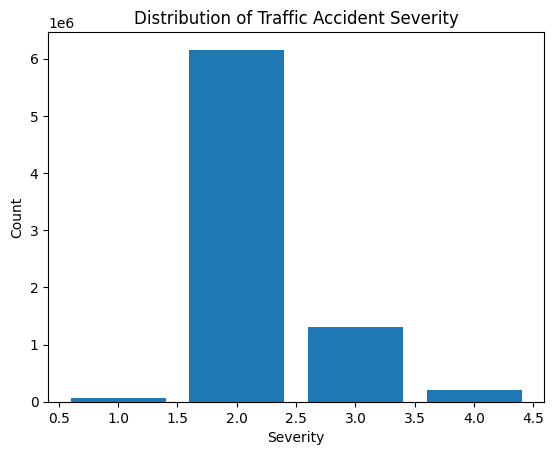

In [ ]:
#Severity: It describes the degree of severity of the accident with a number between 1 and 4,
# where the higher the degree, the more severe the accident was.
# 1 indicates the impact on traffic caused by the accident was the least (i.e., short delay) 
# and 4 indicate a significant impact on traffic (i.e., long delay).

import matplotlib.pyplot as plt

severity_counts = df.groupBy('Severity').agg(count('*').alias('count')).orderBy('Severity')

# Convert the spark df to a pandas df for plotting
severity_counts_pd = severity_counts.toPandas()

# create a bar plot
plt.bar(severity_counts_pd['Severity'], severity_counts_pd['count'])

plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Distribution of Traffic Accident Severity')

plt.show()

# The graph shows the severity of the accident is highly concentrated on the degree of 2.

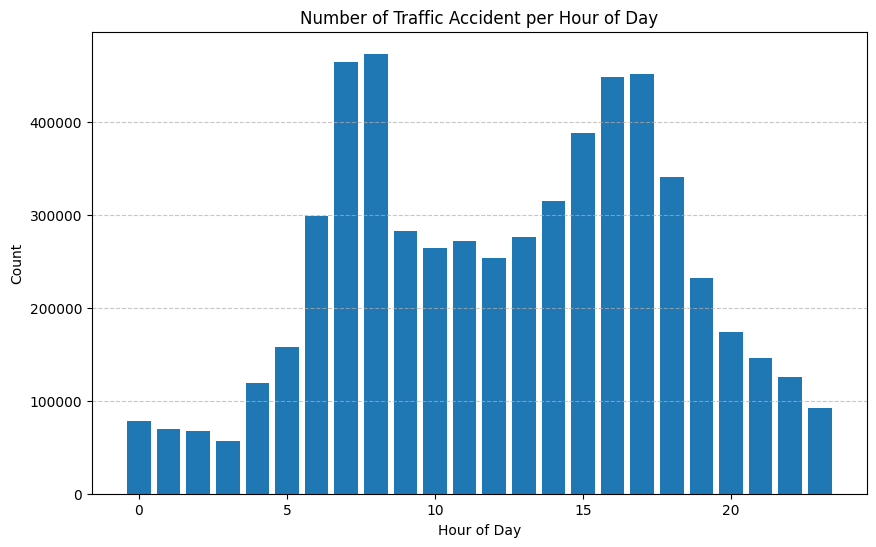

In [ ]:
import matplotlib.pyplot as plt

hourDf = transformed_df.groupBy("hour").count()

hour_pandas = hourDf.toPandas()

plt.figure(figsize=(10,6))
plt.bar(hour_pandas['hour'], hour_pandas['count'])
plt.title('Number of Traffic Accident per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#The graph shows the traffic accidents occur the most in 7-8 a.m. and 4-5 p.m., which are typical rush hour time during the day.

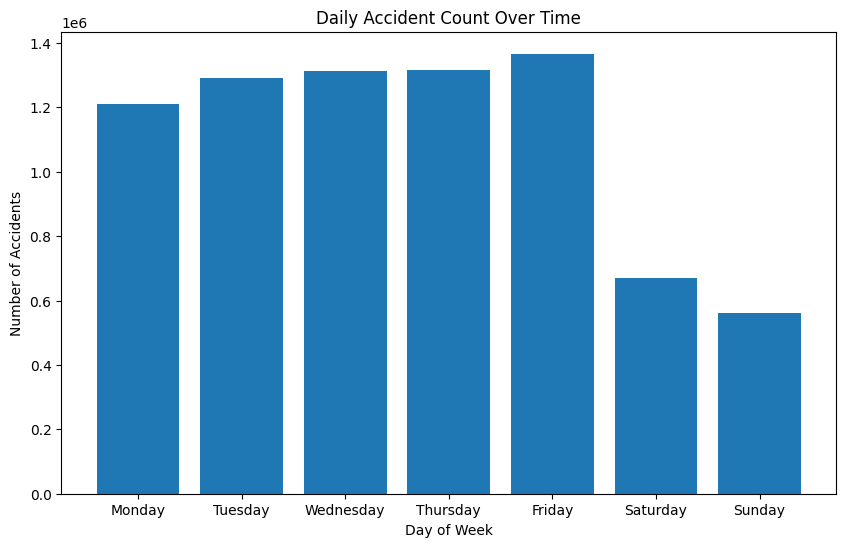

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the date from the timestamp in 'Start_Time' column and create a new column for the accident date

dayOfWeek = df.select(date_format(df.Start_Time, "EEEE").alias("Day"))

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by Day to count the number of accident for each day
num_accidents_per_day = dayOfWeek.groupBy('Day').count().orderBy('Day')

# convert df to pandas to visualize the results
num_accidents_per_day_pd = num_accidents_per_day.toPandas()

# Use Categorical data type to set the specific day order
num_accidents_per_day_pd['Day'] = pd.Categorical(num_accidents_per_day_pd['Day'], categories=day_order, ordered=True)

# Sort DataFrame based on the typical order of a week
num_accidents_per_day_pd = num_accidents_per_day_pd.sort_values('Day')

# plot the graph for the number of accidents per day
plt.figure(figsize=(10, 6))
plt.bar(num_accidents_per_day_pd['Day'], num_accidents_per_day_pd['count'])
plt.title('Daily Accident Count Over Time')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

# It shows that the accidents are mostly happening during weekdays rather than weekends.

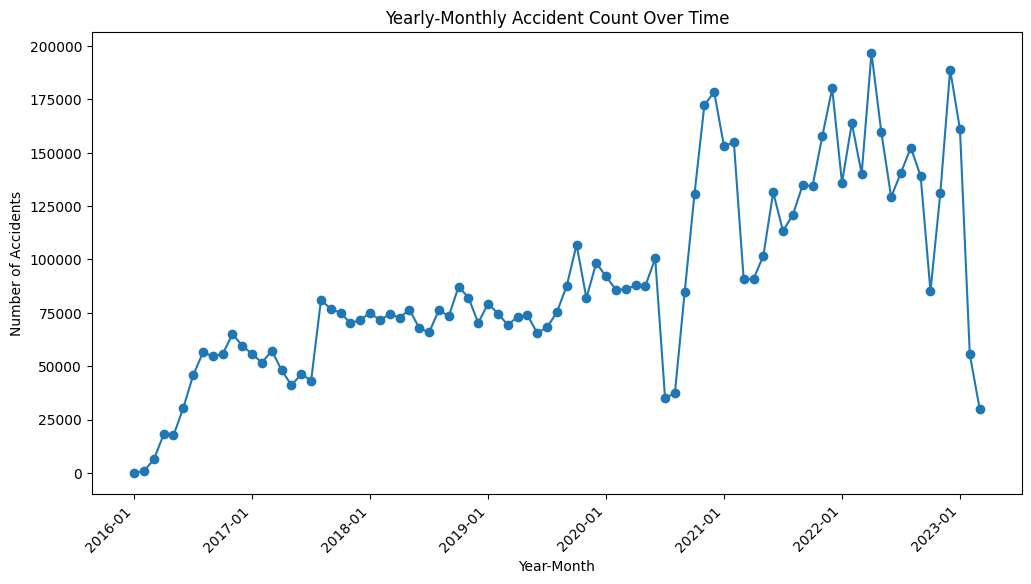

In [ ]:
# Extract the year-month from the timestamp in 'Start_Time' column
temp_df = df.withColumn("Year_Month", date_format(col("Start_Time"), "yyyy-MM"))

# Group by Year_Month to count the number of accidents for each month over time
num_accidents_per_year_month = temp_df.groupBy("Year_Month").count().orderBy("Year_Month")

# Convert df to pandas to visualize the results
num_accidents_per_year_month_pd = num_accidents_per_year_month.toPandas()

# Plot the graph for the number of accidents per each Year-Month
plt.figure(figsize=(12, 6))
plt.plot(num_accidents_per_year_month_pd['Year_Month'], num_accidents_per_year_month_pd['count'], marker='o', linestyle='-')
plt.title('Yearly-Monthly Accident Count Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Accidents')

#select every 12th element as the time range is too long to show in the xticks
plt.xticks(num_accidents_per_year_month_pd['Year_Month'][::12], rotation=45, ha="right")

plt.show()

# Even though there are some fluctuations, the general view of the graph shows an increasing pattern for the number of accidents over time
# from 2016 to 2023, except for the unprecedented low point in the middle of 2020 because of the global pandemic.

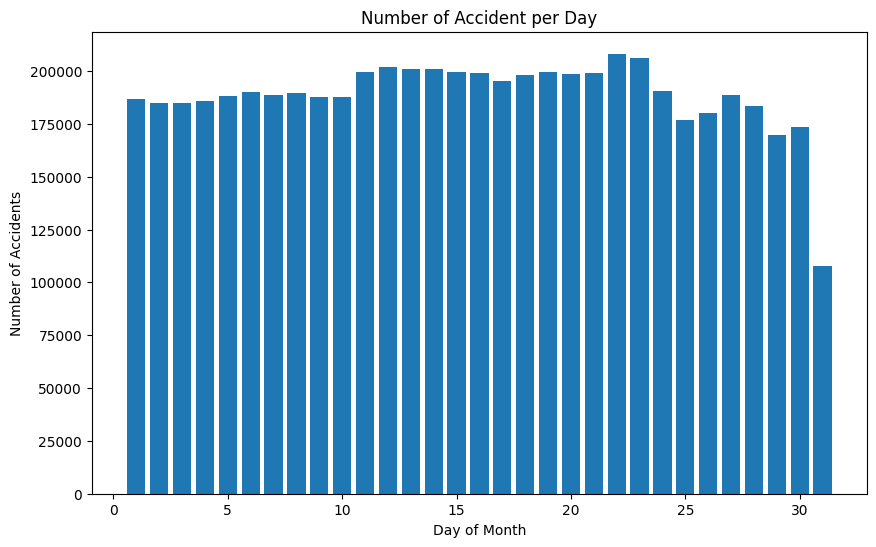

In [ ]:
import matplotlib.pyplot as plt

# Group by day_of_month to count the number of accident for the day of month (i.e., 1 - 31)
count_day = transformed_df.groupBy('day_of_month').count().orderBy("day_of_month")
# convert df to pandas to visualize the results
count_day_pd = count_day.toPandas()

#plot the graph for the number of accidents per day in a month
plt.figure(figsize=(10, 6))
plt.bar(count_day_pd['day_of_month'], count_day_pd['count'])
plt.title('Number of Accident per Day')
plt.xlabel('Day of Month')
plt.ylabel('Number of Accidents')
plt.show()

# The graph shows there are no distinct patterns/differences between days of the month. So I will not use this feature.

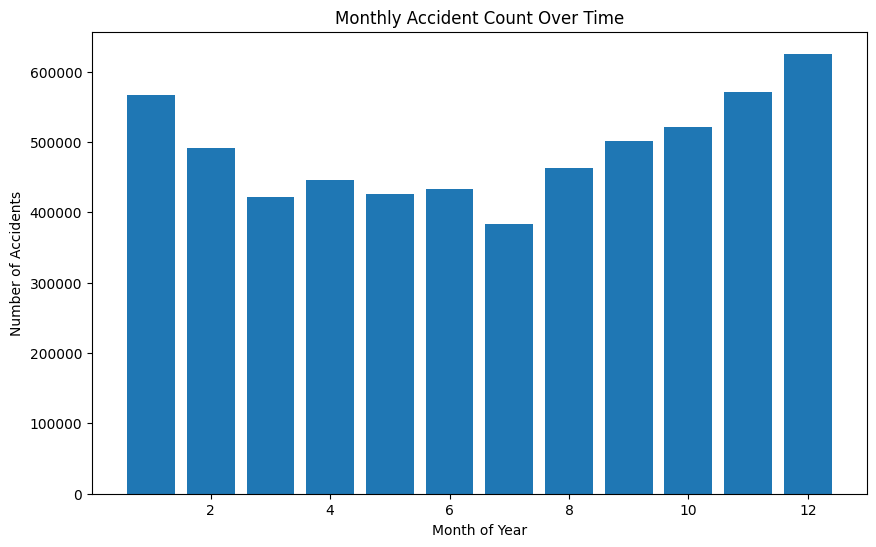

In [ ]:
import matplotlib.pyplot as plt

# Group by month to count the number of accident for each month
num_accidents_per_month = transformed_df.groupBy('month').count().orderBy("month")
# convert df to pandas to visualize the results
num_accidents_per_month_pd = num_accidents_per_month.toPandas()

#plot the graph for the number of accidents per day
plt.figure(figsize=(10, 6))
plt.bar(num_accidents_per_month_pd['month'], num_accidents_per_month_pd['count'])
plt.title('Monthly Accident Count Over Time')
plt.xlabel('Month of Year')
plt.ylabel('Number of Accidents')
plt.show()

# The graph shows November, December, and January have the highest number of accidents, 
# and it appears to have fewer accidents in summer (July is the lowest).

In [ ]:
# check the number of accidents per year
transformed_df.groupBy("year").count().orderBy("year").show()

+----+-------+
|year|  count|
+----+-------+
|2016| 272550|
|2017| 515530|
|2018| 746478|
|2019| 862030|
|2020| 938218|
|2021|1119208|
|2022|1225752|
|2023| 171637|
+----+-------+



In [ ]:
# drop the year 2023 as it contains only the first three months of that year (January through March) which does not 
# provide the full information of that year.
removed_year_df = transformed_df.filter(col("year") < 2023)
removed_year_df.count()

5679766

In [ ]:
# as only 183 rows have null values in column 'City' which won't affect the result, it is decided to simply drop those rows.
removed_city_df = removed_year_df.filter(removed_year_df['City'].isNotNull())

# likewise, drop 'Street' that contains nulls because it is not reasonable to randomly fill them and it is a relatively small proportion of the dataset
removed_street_df = removed_city_df.filter(removed_city_df['Street'].isNotNull())


In [ ]:
removed_street_df.count()

5671812

In [ ]:
removed_street_df.printSchema()

root
 |-- Severity: long (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Street: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- Visibility(mi): double (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Precipitation(in): double (nullable = true)
 |-- Sunrise_Sunset: string (nullable = true)
 |-- Duration: double (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- day_of_month: integer (nullable = true)



# 4. Handling categorical values using StringIndexer

In [ ]:
from pyspark.ml.feature import StringIndexer
string_cols = ['Street', 'City', 'County', 'State', 'Sunrise_Sunset']
stages = []
for val in string_cols:
    # StringIndexer to index the column
    string_indexer = StringIndexer(inputCol=val, outputCol=f"{val}_indexed")
    stages.append(string_indexer)

pipeline = Pipeline(stages=stages)
model = pipeline.fit(removed_street_df).transform(removed_street_df)

model = model.drop(*string_cols)


In [ ]:
model.printSchema()

root
 |-- Severity: long (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- Visibility(mi): double (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Precipitation(in): double (nullable = true)
 |-- Duration: double (nullable = true)
 |-- hour: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- day_of_month: integer (nullable = true)
 |-- Street_indexed: double (nullable = false)
 |-- City_indexed: double (nullable = false)
 |-- County_indexed: double (nullable = false)
 |-- State_indexed: double (nullable = false)
 |-- Sunrise_Sunset_indexed: double (nullable = false)



In [ ]:
model.columns

['Severity',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Duration',
 'hour',
 'day_of_week',
 'month',
 'year',
 'day_of_month',
 'Street_indexed',
 'City_indexed',
 'County_indexed',
 'State_indexed',
 'Sunrise_Sunset_indexed']

# Correlation Evaluation Using Correlation Heatmap

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
# Define the features
feature_cols = ['Severity',
'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Duration',
 'hour',
 'day_of_week',
 'month',
 'year',
 'day_of_month',
 'Street_indexed',
 'City_indexed',
 'County_indexed',
 'State_indexed',
 'Sunrise_Sunset_indexed']

# Assemble features into a vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="skip") 
prepared_df = assembler.transform(model)

corr_matrix = Correlation.corr(prepared_df, "features").head()
corr_matrix = corr_matrix[0].toArray()

import pandas as pd
corr_matrix_df = pd.DataFrame(corr_matrix, columns=feature_cols, index=feature_cols)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(corr_matrix_df)

                        Severity  Start_Lat  Start_Lng  Distance(mi)  \
Severity                1.000000   0.080559   0.063598     -0.080855   
Start_Lat               0.080559   1.000000  -0.094817      0.038667   
Start_Lng               0.063598  -0.094817   1.000000      0.009703   
Distance(mi)           -0.080855   0.038667   0.009703      1.000000   
Temperature(F)         -0.032201  -0.449489   0.005201     -0.021322   
Wind_Chill(F)          -0.035611  -0.453351  -0.010070     -0.022854   
Humidity(%)             0.017868   0.002725   0.191253     -0.026103   
Pressure(in)           -0.026010  -0.243009   0.225062     -0.009135   
Visibility(mi)         -0.030481  -0.121748   0.000167      0.005705   
Wind_Speed(mph)         0.031048   0.018908   0.091038      0.014728   
Precipitation(in)       0.018515  -0.008745   0.029845     -0.001460   
Duration               -0.095029   0.007926  -0.052898      0.104184   
hour                    0.023111  -0.019212   0.002862      0.05

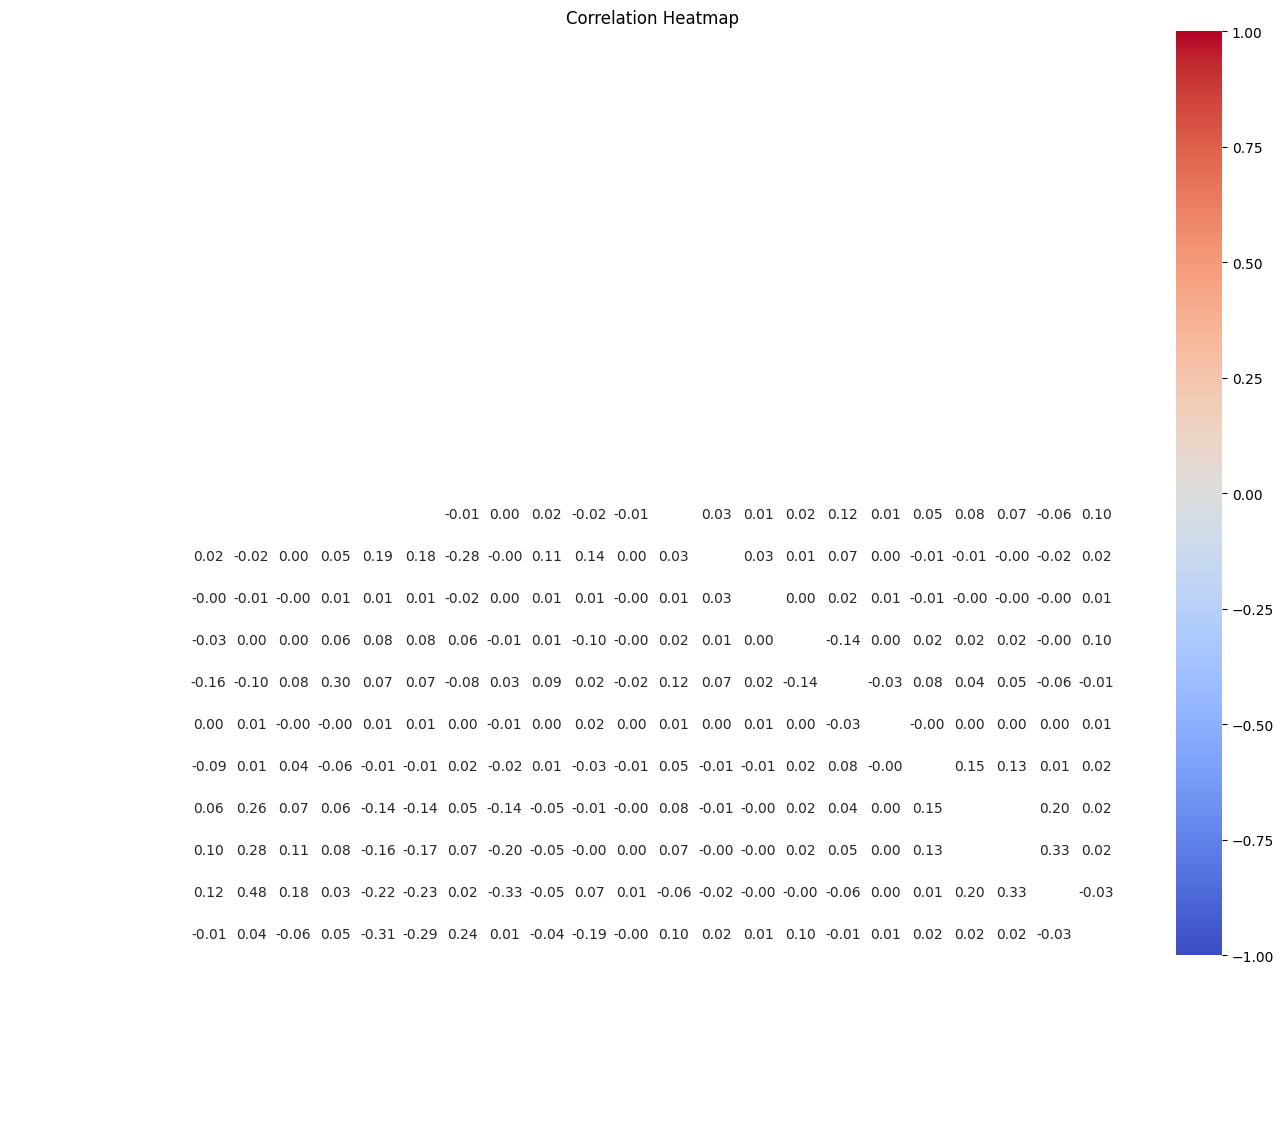

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix_df, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# based on the result, it shows there are not many features that are having strong correlation with Duration.
# but it only shows the linear relationships so we cannot determine the non-linear relationships.
# therefore, by considering all oberservations we have made, we will select "severity, distance, temperature, start_lat,
# start_lng, visibility, sunrise_sunset, hour, day_of_week, month, year" as the independent variables to be used in our models.

# 5. Handling categorical values using one hot encoding

In [ ]:
new_df = model.select('Severity', "Start_Lat", "Start_Lng", 'Distance(mi)', 'Temperature(F)', 'Visibility(mi)', 'Duration', 'Sunrise_Sunset_indexed','hour','day_of_week','month','year')

In [ ]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline

categorical_cols = ['Severity','hour','day_of_week','month','year']
# I treat time-related features as categorical here because they do not have a linear relationship; 
# each day of week, each month, each year are more like categories.
# even using them as numerical values and conducting experiments, it was observed that they perform better when treated as categorical features.
stages = []

for val in categorical_cols:
    encoder = OneHotEncoder(inputCol=val, outputCol=f"{val}_encoded")
    stages.append(encoder)

pipeline = Pipeline(stages=stages)
onehot_df = pipeline.fit(new_df).transform(new_df)

onehot_df = onehot_df.drop(*categorical_cols)



# 6. Standardization of numerical features

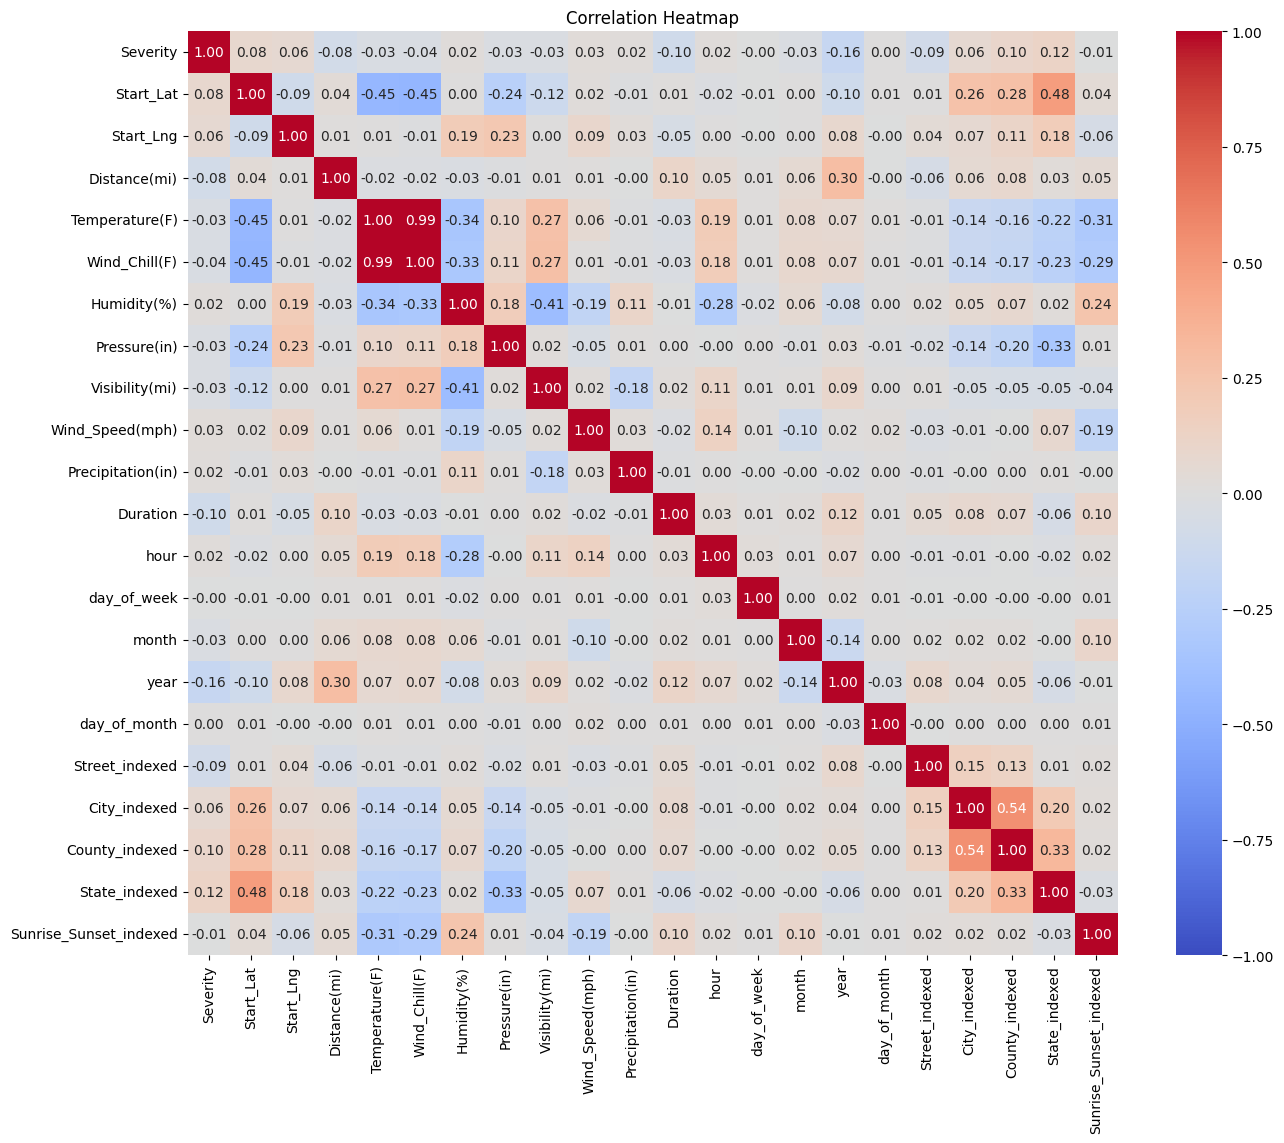

In [ ]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

numeric_cols = ["Start_Lat", "Start_Lng", 'Distance(mi)', 'Temperature(F)', 'Visibility(mi)']
assembler = VectorAssembler(inputCols=numeric_cols, outputCol='numeric_features')
scaler = StandardScaler(inputCol='numeric_features', outputCol='scaled_features')

pipeline_numeric = Pipeline(stages=[assembler, scaler])
transformed_df_numeric = pipeline_numeric.fit(onehot_df).transform(onehot_df)


